In [1]:
import os
os.environ['NUMBA_DISABLE_JIT'] = '1'
import pandas as pd
file = r'C:\Users\Oscar\Downloads\vol_playground\alasso_aggregated_no_strikeid_deduped.csv'

raw_df = pd.read_csv(file)
yday = '2025-08-13'
latest_df = raw_df[raw_df["datetime"] == yday]
latest_df['type'] = latest_df['type'].replace({'c': 'call', 'p': 'put'})
latest_df['maturity'] = latest_df['dte'] / 365

# seperate calls and puts
calls_df = latest_df[latest_df["type"] == 'call']
puts_df = latest_df[latest_df["type"] == 'put']

C:\Users\Oscar\AppData\Local\Temp\ipykernel_27000\1723810428.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['type'] = latest_df['type'].replace({'c': 'call', 'p': 'put'})
C:\Users\Oscar\AppData\Local\Temp\ipykernel_27000\1723810428.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['maturity'] = latest_df['dte'] / 365


In [2]:
Kc = calls_df['strike']
Tc = calls_df['dte']
C0 = calls_df['value']

Kp = puts_df['strike']
Tp = puts_df['dte']
P0 = puts_df['value']

S0 = calls_df['underlying']

In [3]:
calls_df

,datetime,_underlying_id,_roll_id,_period_type,expiration_date,period_contract_name,dte,type,strike,strike_min,strike_max,delta,mny,iv,value,open_interest,volume,underlying,maturity
5612,2025-08-13,COM.TTF,0D_1,month:Jan,2025-12-24,January-26,133,call,300.0,300.0,300.0,0.000002,8.717382,0.740657,0.000005,0.0,0.0,34.414,0.364384
30178,2025-08-13,COM.TTF,0D_1,month:Jan,2025-12-24,January-26,133,call,200.0,200.0,200.0,0.000103,5.811588,0.740657,0.000343,114.0,0.0,34.414,0.364384
51596,2025-08-13,COM.TTF,0D_1,month:Jan,2025-12-24,January-26,133,call,51.0,51.0,51.0,0.179367,1.481955,0.593995,1.025937,0.0,0.0,34.414,0.364384
51597,2025-08-13,COM.TTF,0D_1,month:Jan,2025-12-24,January-26,133,call,50.0,50.0,50.0,0.190352,1.452897,0.587228,1.093409,20106.0,650.0,34.414,0.364384
54524,2025-08-13,COM.TTF,0D_1,month:Jan,2025-12-24,January-26,133,call,52.0,52.0,52.0,0.169220,1.511013,0.600614,0.964157,505.0,0.0,34.414,0.364384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033093,2025-08-13,COM.TTF,0D_1,month:Dec,2025-11-26,December-25,105,call,72.0,72.0,72.0,0.047465,2.101576,0.741013,0.233038,0.0,0.0,34.260,0.287671
7035211,2025-08-13,COM.TTF,0D_1,month:Dec,2025-11-26,December-25,105,call,73.0,73.0,73.0,0.045669,2.130765,0.746790,0.224532,0.0,0.0,34.260,0.287671
7037329,2025-08-13,COM.TTF,0D_1,month:Dec,2025-11-26,December-25,105,call,74.0,74.0,74.0,0.044000,2.159953,0.752567,0.216669,20.0,0.0,34.260,0.287671
7045763,2025-08-13,COM.TTF,0D_1,month:Dec,2025-11-26,December-25,105,call,150.0,150.0,150.0,0.000339,4.378284,0.764121,0.001114,1430.0,0.0,34.260,0.287671


C:\Users\Oscar\AppData\Local\Temp\ipykernel_27000\3841965339.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['Implied Forward'] = latest_df['maturity'].map(maturity_to_fwd)
C:\Users\Oscar\AppData\Local\Temp\ipykernel_27000\3841965339.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_df['Implied Forward']  = calls_df['maturity'].map(maturity_to_fwd)
C:\Users\Oscar\AppData\Local\Temp\ipykernel_27000\3841965339.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

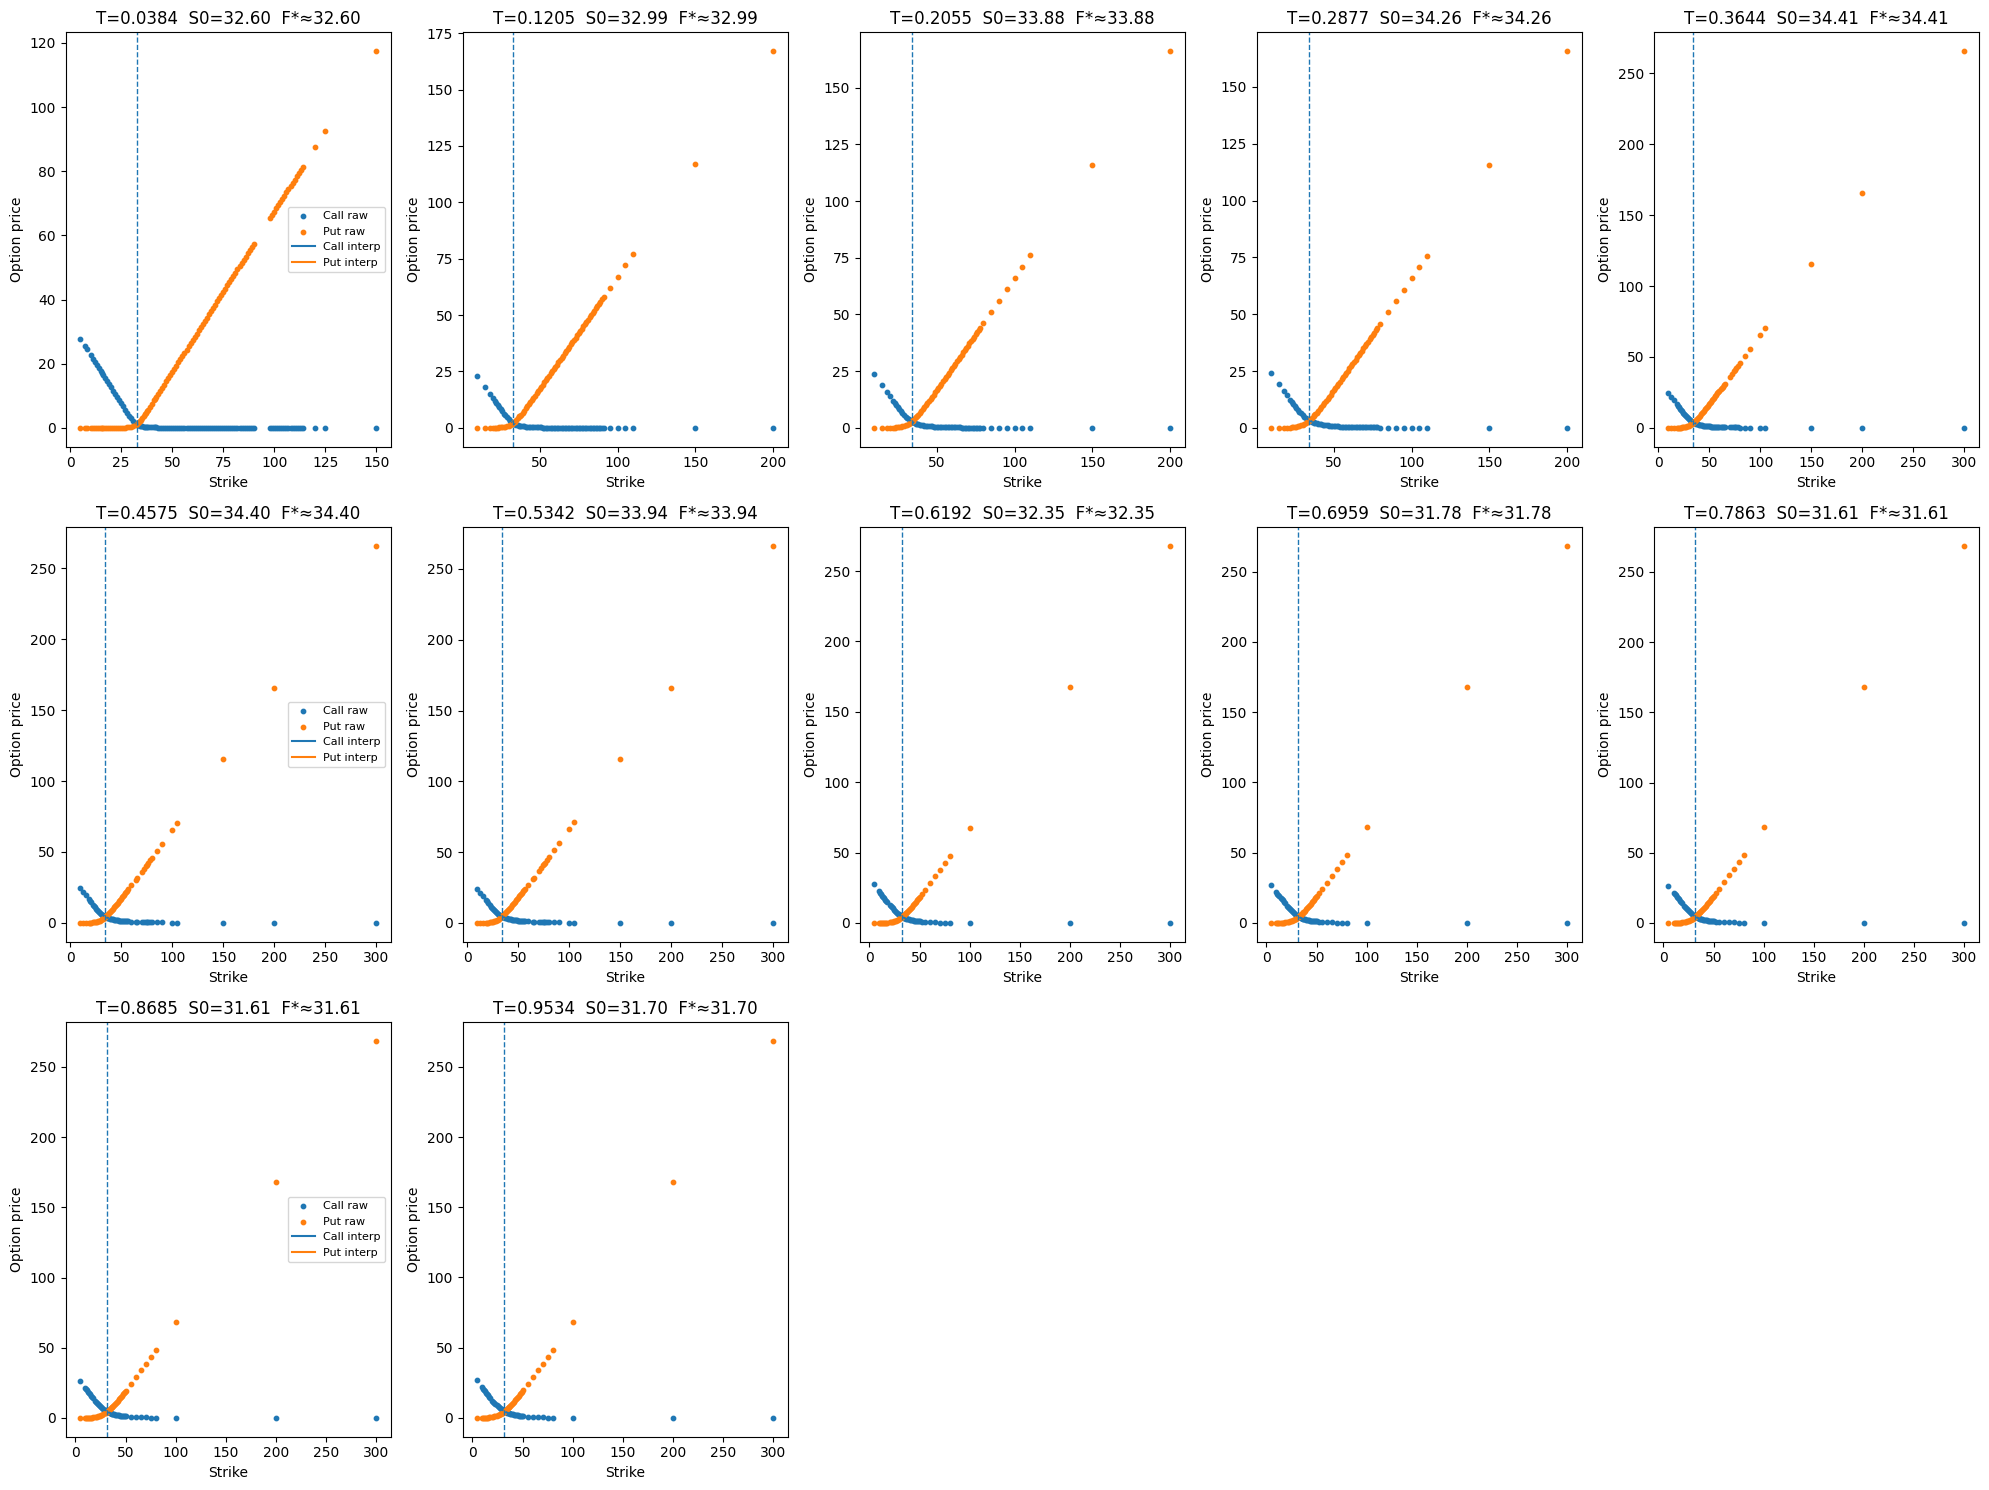

In [4]:
import numpy as np
import pandas as pd
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt

# Unique maturities (numeric year-fractions preferred)
T_vectU = np.sort(latest_df['maturity'].unique())

npt  = 10_000     # grid density multiplier
m    = 0.15       # range multiplier around S0*e^{±mT}
nCol = 5
nRow = int(np.ceil(len(T_vectU) / nCol))   # ✅ keep nRow

# Per-maturity underlying (spot/forward) lookup (median across rows)
S0_by_T = (
    pd.concat([calls_df[['maturity','underlying']], puts_df[['maturity','underlying']]], ignore_index=True)
      .dropna()
      .groupby('maturity')['underlying'].median()
)

def build_pchip(df):
    tmp = (df[['strike','value']].dropna()
             .groupby('strike', as_index=False)['value'].median()
             .sort_values('strike'))
    if len(tmp) < 2:
        return None, None, None
    return (
        PchipInterpolator(tmp['strike'].to_numpy(), tmp['value'].to_numpy(), extrapolate=False),
        tmp['strike'].to_numpy(),
        tmp['value'].to_numpy()
    )

xMatch  = {}   # maturity -> implied forward
results = {}

# --- plotting grid using nRow, nCol ---
fig, axes = plt.subplots(nRow, nCol, figsize=(20, 5 * nRow), squeeze=False)

for idx, T in enumerate(T_vectU):
    ax = axes[idx // nCol, idx % nCol]

    S0_T = S0_by_T.get(T, np.nan)
    calls_T = calls_df.loc[calls_df['maturity'] == T].sort_values('strike')
    puts_T  = puts_df.loc[puts_df['maturity'] == T].sort_values('strike')

    call_interp, c_strikes, c_vals = build_pchip(calls_T)
    put_interp,  p_strikes, p_vals = build_pchip(puts_T)

    if not np.isfinite(S0_T) or call_interp is None or put_interp is None:
        ax.set_title(f"T={T:.4f}  (insufficient data)")
        ax.axis('off')
        continue

    low  = S0_T * np.exp(-m * T)
    high = S0_T * np.exp(m * T)
    if high <= low:
        ax.set_title(f"T={T:.4f}  (bad bounds)")
        ax.axis('off')
        continue

    num_points = int(max(50, np.ceil((high - low) * npt)))
    x = np.linspace(low, high, num_points)

    C0a = call_interp(x)
    P0a = put_interp(x)
    mask = np.isfinite(C0a) & np.isfinite(P0a)
    if mask.sum() == 0:
        ax.set_title(f"T={T:.4f}  (no overlap)")
        ax.axis('off')
        continue

    # implied forward ~ put-call parity intersection
    diff = np.abs(P0a[mask] - C0a[mask])
    fwd_T = x[mask][np.argmin(diff)]
    xMatch[T] = fwd_T

    # store results
    results[T] = {
        'grid': x, 'calls_interp': C0a, 'puts_interp': P0a,
        'raw_calls': calls_T, 'raw_puts': puts_T, 'bounds': (low, high),
        'S0': S0_T, 'fwd': fwd_T
    }

    # --- plot (raw points + interpolants + implied forward) ---
    ax.scatter(c_strikes, c_vals, s=10, label='Call raw')
    ax.scatter(p_strikes, p_vals, s=10, label='Put raw')
    ax.plot(x[mask], C0a[mask], label='Call interp')
    ax.plot(x[mask], P0a[mask], label='Put interp')
    ax.axvline(fwd_T, linestyle='--', linewidth=1)
    ax.set_title(f"T={T:.4f}  S0={S0_T:.2f}  F*≈{fwd_T:.2f}")
    ax.set_xlabel("Strike")
    ax.set_ylabel("Option price")
    if idx % nCol == 0:
        ax.legend(fontsize=8)

# Hide unused axes (if any)
for j in range(len(T_vectU), nRow * nCol):
    ax = axes[j // nCol, j % nCol]
    ax.axis('off')

plt.tight_layout()

# Map implied forward back into dataframes
maturity_to_fwd = pd.Series(xMatch)
latest_df['Implied Forward'] = latest_df['maturity'].map(maturity_to_fwd)
calls_df['Implied Forward']  = calls_df['maturity'].map(maturity_to_fwd)
puts_df['Implied Forward']   = puts_df['maturity'].map(maturity_to_fwd)

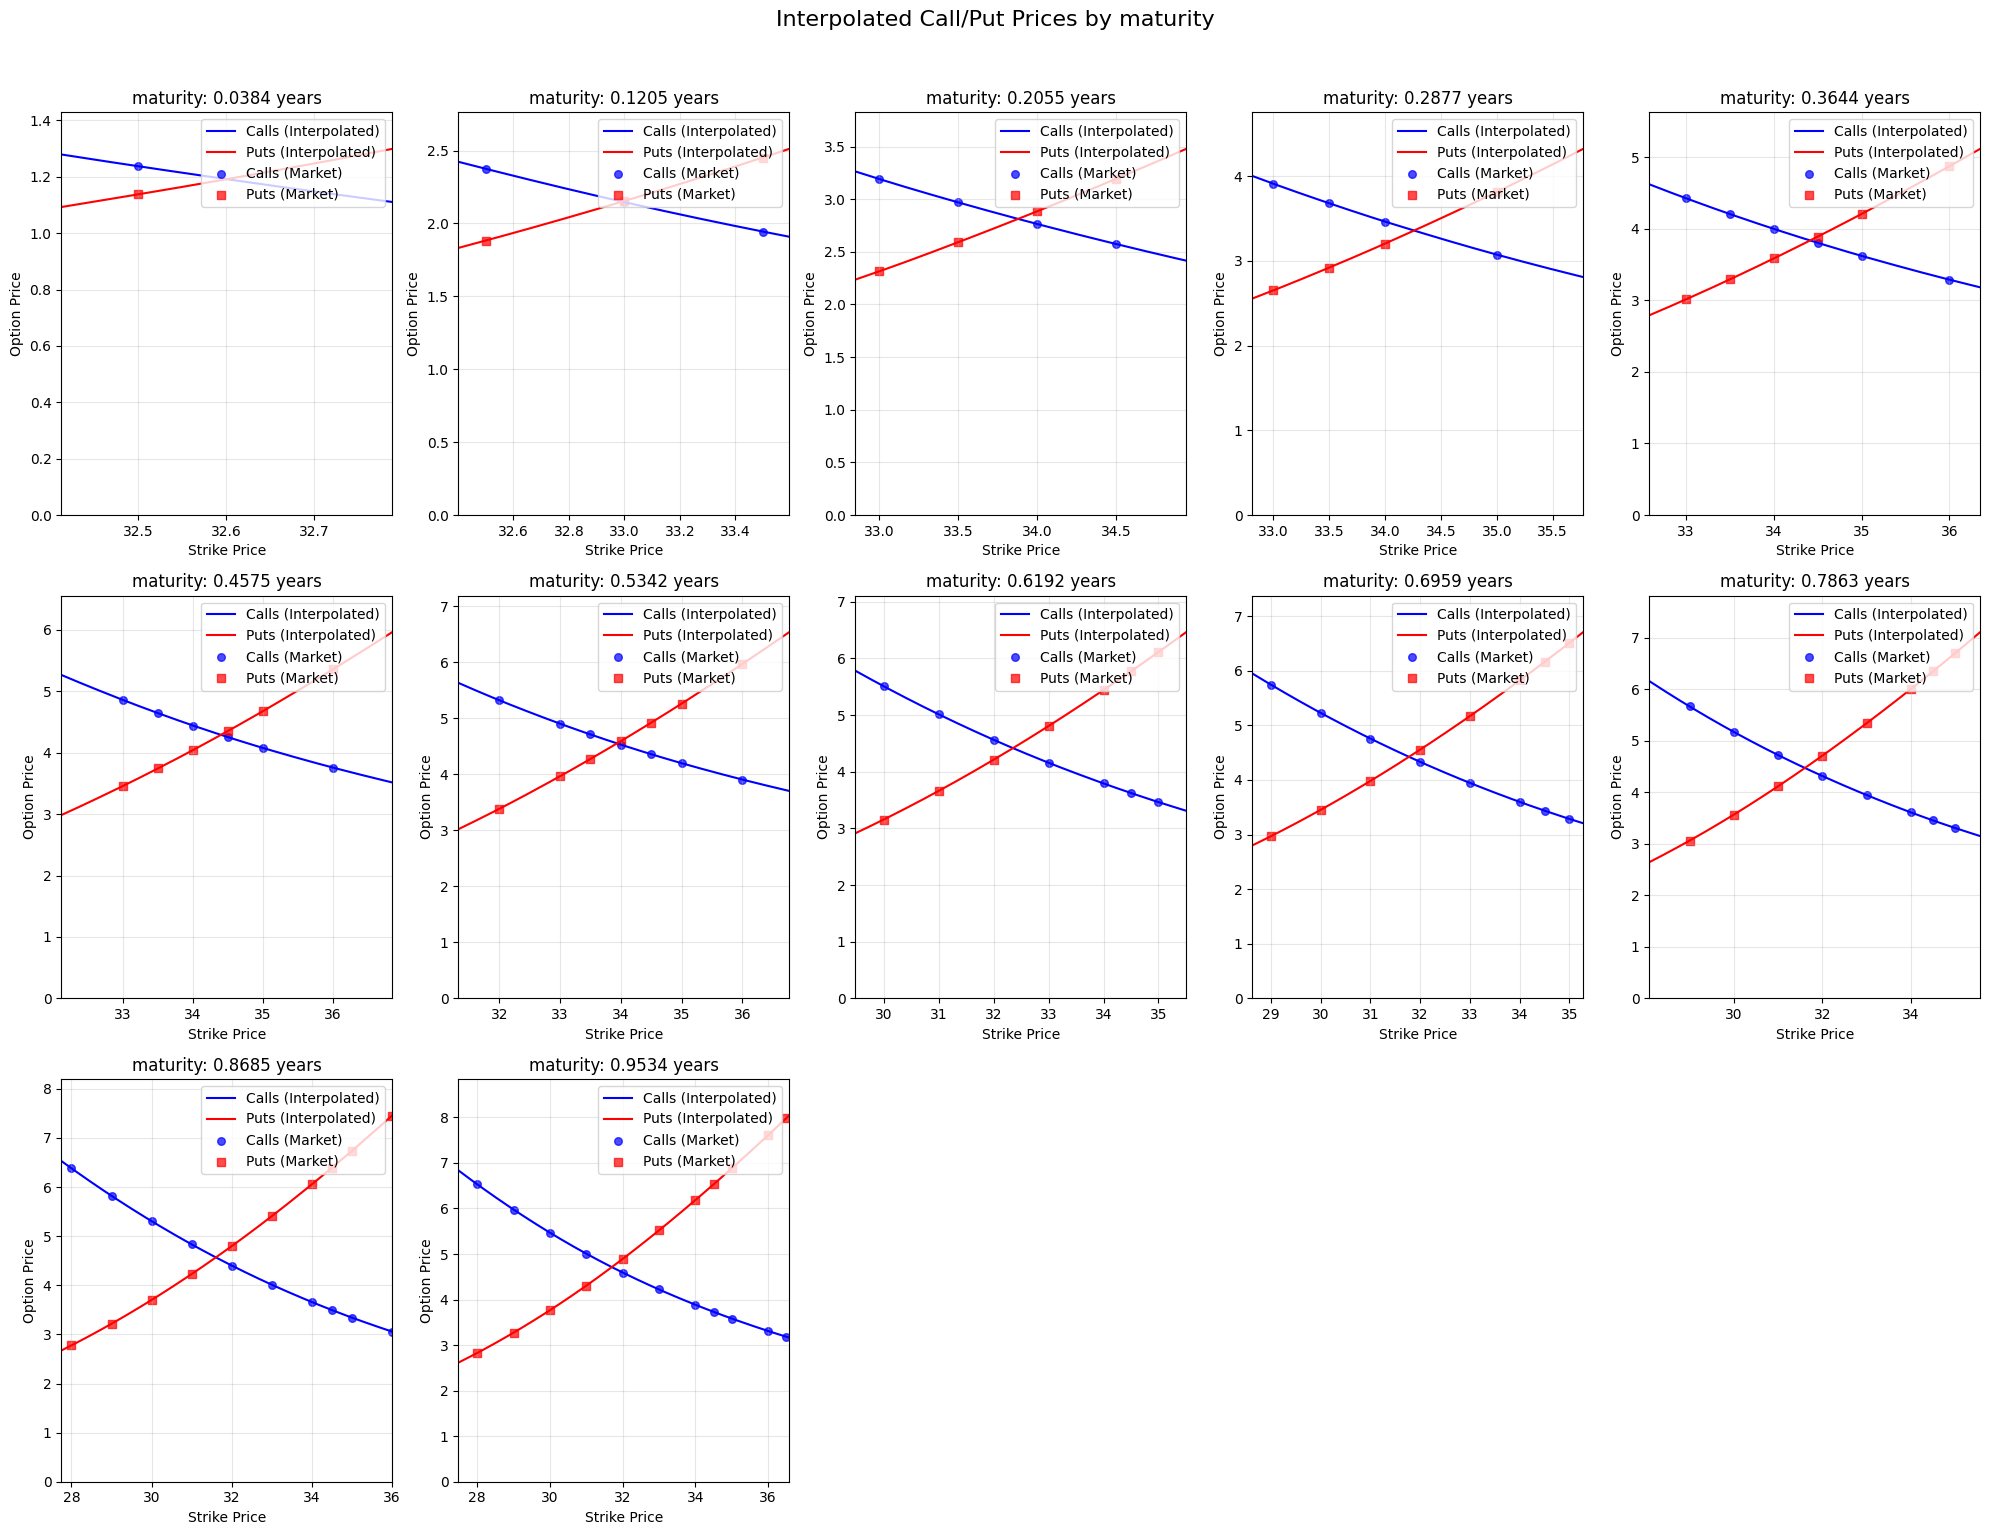

In [5]:
# Create figure with subplot grid
plt.figure(figsize=(20, 5*nRow))
plt.suptitle("Interpolated Call/Put Prices by maturity", y=1.02, fontsize=16)

for idx, T in enumerate(T_vectU):
    # Get results for current maturity
    res = results[T]
    x = res['grid']
    C0a = res['calls_interp']
    P0a = res['puts_interp']
    raw_calls = res['raw_calls']
    raw_puts = res['raw_puts']
    
    # Create subplot
    ax = plt.subplot(nRow, nCol, idx+1)
    
    # Plot interpolated prices
    ax.plot(x, C0a, 'b-', label='Calls (Interpolated)', linewidth=1.5)
    ax.plot(x, P0a, 'r-', label='Puts (Interpolated)', linewidth=1.5)
    
    # Plot raw market prices
    ax.scatter(raw_calls['strike'], raw_calls['value'], 
               c='blue', s=30, marker='o', label='Calls (Market)', alpha=0.7)
    ax.scatter(raw_puts['strike'], raw_puts['value'], 
               c='red', s=30, marker='s', label='Puts (Market)', alpha=0.7)
    
    
    # Formatting
    ax.set_title(f"maturity: {T:.4f} years")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Option Price")
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')
    
    # Set sensible axis limits
    ax.set_xlim(res['bounds'][0], res['bounds'][1])
    ax.set_ylim(0, max(np.nanmax(C0a), np.nanmax(P0a)) * 1.1)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [6]:
rates_df = pd.read_excel(r"C:\Users\Oscar\Downloads\vol_playground\USDOIS.xlsx")
rates_df = rates_df.iloc[:, [0,3]]
rates_df 


,Tenor,Yield
0,1W,4.3285
1,2W,4.3310
2,3W,4.3320
3,1M,4.3343
4,2M,4.2222
5,3M,4.1596
6,4M,4.1043
7,5M,4.0383
8,6M,3.9890
9,7M,3.9503


In [7]:
import numpy as np
import pandas as pd
import re

# Robust tenor -> years (ACT/360)
def tenor_to_years(x):
    if pd.isna(x):
        return np.nan
    # If it's already numeric (assume years), pass through
    if isinstance(x, (int, float, np.integer, np.floating)):
        return float(x)

    s = str(x).strip().upper()

    # Common overnight/short labels (optional)
    if s in {"ON", "O/N"}:
        return 1/360
    if s in {"TN", "T/N"}:     # tomorrow/next
        return 2/360

    m = re.match(r'^(\d+(?:\.\d+)?)([DWMY])$', s)
    if not m:
        raise ValueError(f"Invalid Tenor format: {x!r}")

    num = float(m.group(1))
    unit = m.group(2)
    days_per_unit = {'D':1, 'W':7, 'M':30, 'Y':360}[unit]
    return (num * days_per_unit) / 360.0

# Apply safely
rates_df = rates_df.copy()
rates_df['TenorYears'] = rates_df['Tenor'].apply(tenor_to_years)
rates_df['Yield'] = pd.to_numeric(rates_df['Yield'], errors='coerce') / 100.0

# Discount factors (choose compounding as needed)
rates_df['DF_cont']   = np.exp(-rates_df['Yield'] * rates_df['TenorYears'])        # continuous
rates_df['DF_simple'] = 1.0 / (1.0 + rates_df['Yield'] * rates_df['TenorYears'])   # simple
rates_df['DF_annual'] = 1.0 / np.power(1.0 + rates_df['Yield'], rates_df['TenorYears'])  # annual comp

rates_df = rates_df[['TenorYears', 'Yield']]
rates_df


,TenorYears,Yield
0,0.019444,0.043285
1,0.038889,0.043310
2,0.058333,0.043320
3,0.083333,0.043343
4,0.166667,0.042222
5,0.250000,0.041596
6,0.333333,0.041043
7,0.416667,0.040383
8,0.500000,0.039890
9,0.583333,0.039503


In [8]:
from scipy.interpolate import CubicSpline

# Assuming:
# - rates_df contains columns 'Tenor_Years' and yield values
# - merged_df contains the target maturities

# 1. Prepare the rate curve data (use your actual column name)
x_known = rates_df['TenorYears'].values  # Known tenors in years
y_known = rates_df['Yield'].values  # Corresponding yields

# 2. Sort the data for interpolation
sort_idx = np.argsort(x_known)
x_known = x_known[sort_idx]
y_known = y_known[sort_idx]

# 3. Create cubic spline interpolator
cs = CubicSpline(x_known, y_known)

# 4. Get target maturities from merged_df
target_maturities = latest_df['maturity'].unique()

# 5. Interpolate rates
interpolated_rates = cs(target_maturities)

# 6. Create interpolation DataFrame
interpolation_df = pd.DataFrame({
    'maturity': target_maturities,
    'Interpolated_Rate': interpolated_rates
})

# 7. Merge back to original DataFrame
latest_df = latest_df.merge(interpolation_df, on='maturity', how='left')

# Show results
print(interpolation_df.sort_values('maturity').tail(10))

    maturity  Interpolated_Rate
10  0.205479           0.041839
11  0.287671           0.041373
0   0.364384           0.040794
1   0.457534           0.040116
2   0.534247           0.039736
3   0.619178           0.039293
4   0.695890           0.038859
5   0.786301           0.038482
6   0.868493           0.038097
7   0.953425           0.037685


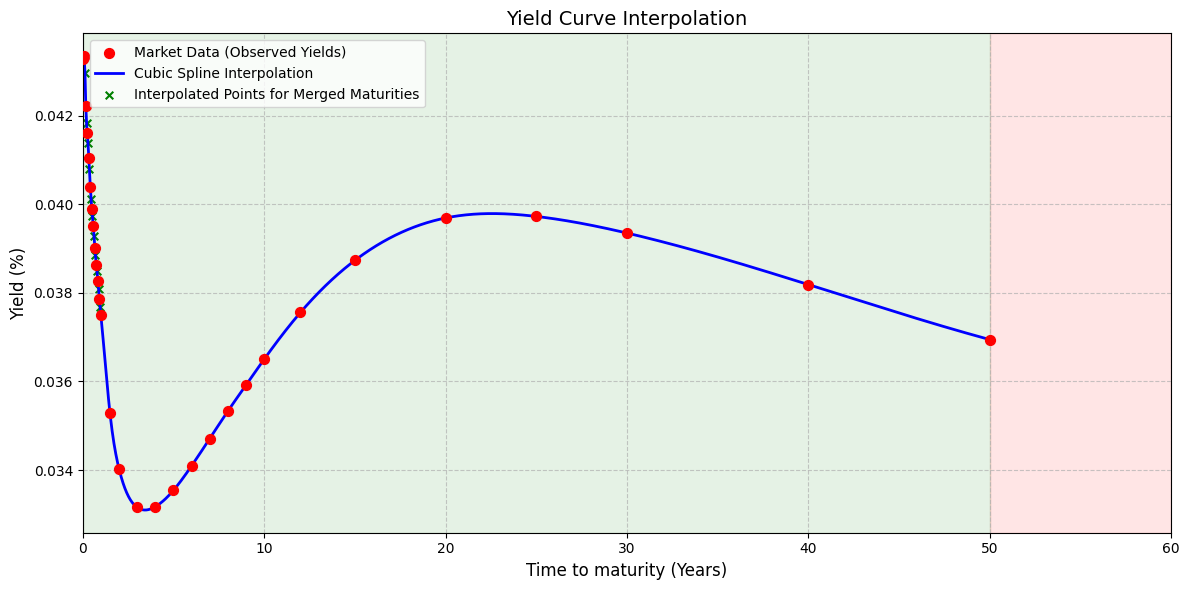

In [9]:
x_known = rates_df['TenorYears'].values  # Original tenors (years)
y_known = rates_df['Yield'].values  # Original yields

# Sort the data
sort_idx = np.argsort(x_known)
x_known = x_known[sort_idx]
y_known = y_known[sort_idx]

# Create cubic spline
cs = CubicSpline(x_known, y_known, extrapolate=False)  # Disable extrapolation

# Generate a dense grid for smooth plotting
x_dense = np.linspace(min(x_known), max(x_known), 1000)  # 1000 points for smoothness
y_dense = cs(x_dense)

plt.figure(figsize=(12, 6))

# Plot original data points
plt.scatter(
    x_known, y_known,
    color='red', s=50, zorder=3,
    label='Market Data (Observed Yields)'
)

# Plot interpolated curve
plt.plot(
    x_dense, y_dense,
    linewidth=2, linestyle='-',
    color='blue', label='Cubic Spline Interpolation'
)

# Highlight target maturities from `merged_df`
target_maturities = latest_df['maturity'].unique()
plt.scatter(
    target_maturities, cs(target_maturities),
    color='green', s=30, marker='x',
    label='Interpolated Points for Merged Maturities'
)

# Formatting
plt.title('Yield Curve Interpolation', fontsize=14)
plt.xlabel('Time to maturity (Years)', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Annotate key regions
min_tenor, max_tenor = min(x_known), max(x_known)
plt.axvspan(min_tenor, max_tenor, alpha=0.1, color='green', label='Interpolation Range')
plt.axvspan(max_tenor, 1.2*max_tenor, alpha=0.1, color='red', label='Extrapolation Risk')

plt.xlim(0, 1.2*max_tenor)
plt.tight_layout()
plt.show()

In [10]:
import py_vollib.black.implied_volatility
import py_vollib_vectorized

latest_df['type'] = latest_df['type'].replace({'call': 'c', 'put': 'p'})
iv = py_vollib_vectorized.vectorized_implied_volatility_black(latest_df['value'], latest_df['Implied Forward'], latest_df['strike'], latest_df['Interpolated_Rate'], latest_df['maturity'],flag=latest_df['type'], return_as='series')
latest_df['Calculated Implied Vol'] = iv

In [11]:
latest_df['Calculated Implied Vol'].isna().sum()
iv_puts = latest_df[latest_df['type'] == 'p'][['Calculated Implied Vol']]
iv_calls = latest_df[latest_df['type'] == 'c'][['Calculated Implied Vol']]

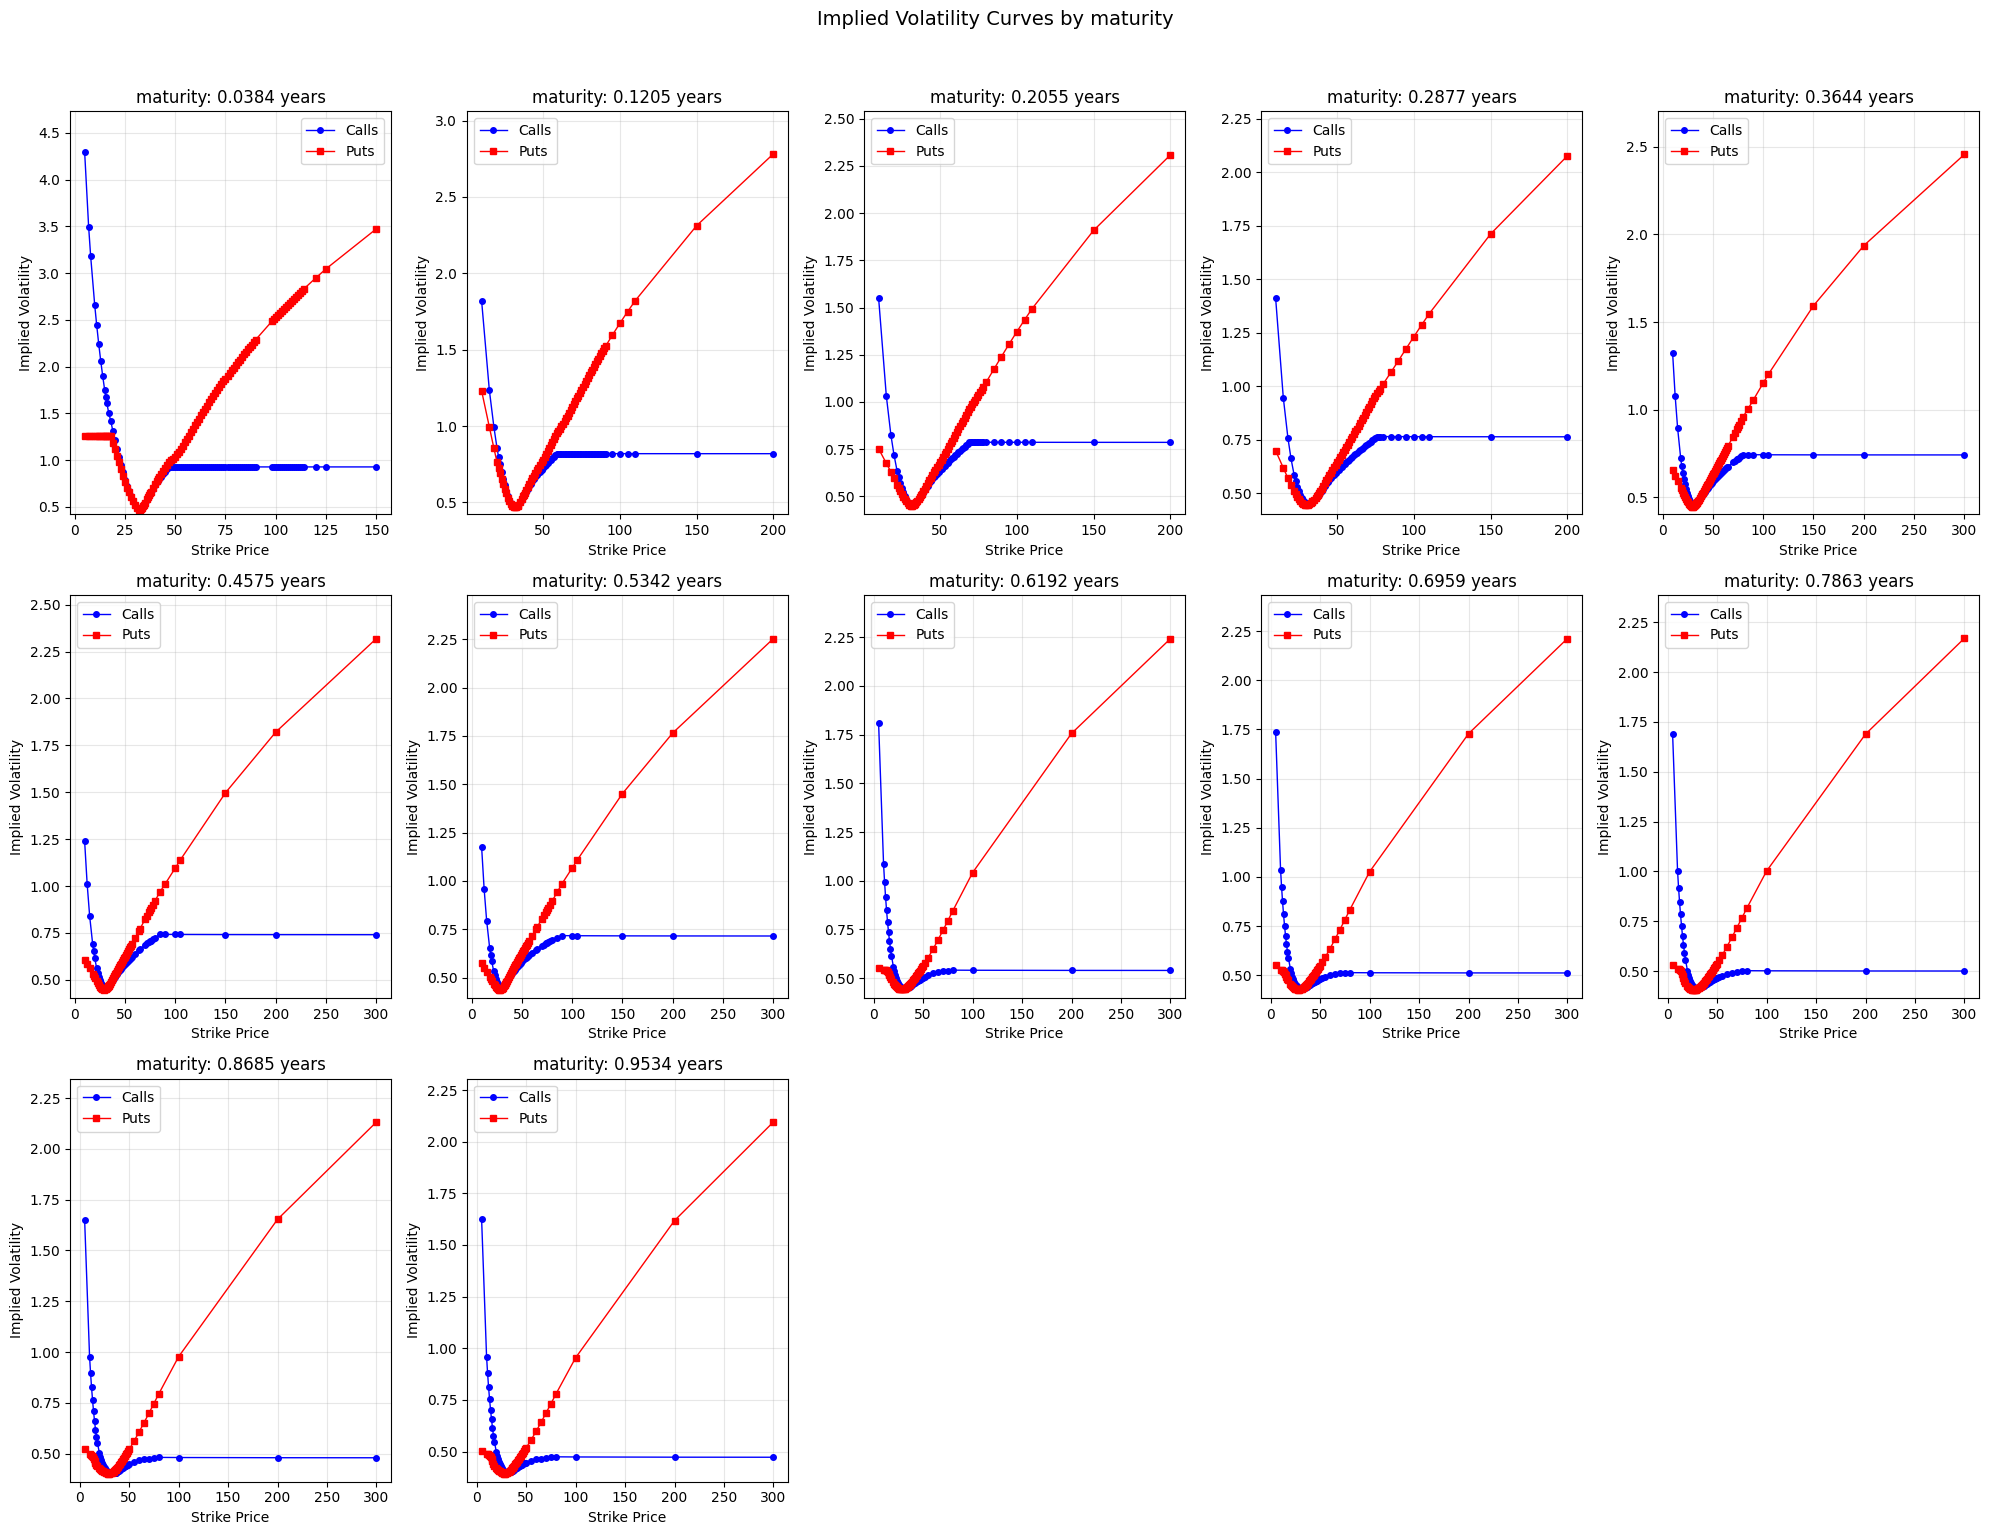

In [12]:
# Create figure with subplot grid
plt.figure(figsize=(20, 5*nRow))
plt.suptitle("Implied Volatility Curves by maturity", y=1.02, fontsize=14)

for idx, T in enumerate(T_vectU):
    # Filter data for current maturity
    maturity_mask = latest_df['maturity'] == T
    
    # Get calls and puts for this maturity
    calls = latest_df[(latest_df['type'] == 'c') & maturity_mask].sort_values('strike')
    puts = latest_df[(latest_df['type'] == 'p') & maturity_mask].sort_values('strike')
    
    # Create subplot
    ax = plt.subplot(nRow, nCol, idx+1)
    
    # Plot call IVs
    ax.plot(calls['strike'], calls['Calculated Implied Vol'], 
            'b-o', markersize=4, linewidth=1, label='Calls')
    
    # Plot put IVs
    ax.plot(puts['strike'], puts['Calculated Implied Vol'], 
            'r-s', markersize=4, linewidth=1, label='Puts')
    
    # Formatting
    ax.set_title(f"maturity: {T:.4f} years")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Implied Volatility")
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Set consistent axis limits
    all_iv = pd.concat([calls['Calculated Implied Vol'], puts['Calculated Implied Vol']])
    ax.set_ylim(all_iv.min()*0.9, all_iv.max()*1.1)

# Adjust layout and show plot
plt.tight_layout()
plt.show()